In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Creating datapoints to test (Phase-1)

In [2]:
np.random.seed(100) #Seed for reproducibility

#Creating uniform distribution of 10k length
distri = np.random.rand(1,10000) 

#Creating Gaussian distribution of 10k length
distri_gaussian = np.random.normal(loc=np.mean(distri),scale=np.std(distri),size=(1,10000)) 

#Creating uniform distribution of 10k length of different mean & Std Dev
distri_gaussian_2 = np.random.normal(loc=np.mean(distri)+1,scale=np.std(distri)+0.5,size=(1,10000))

#----------------------------------------------------------------------------------------------------
distri[0:10]

array([[0.54340494, 0.27836939, 0.42451759, ..., 0.36073758, 0.03331551,
        0.09242924]])

# Visualizing the distributions

[Text(0.5, 0, 'Distribution'),
 Text(0, 0.5, 'Probability density'),
 Text(0.5, 1.0, 'KDE Comparison of all three distributions')]

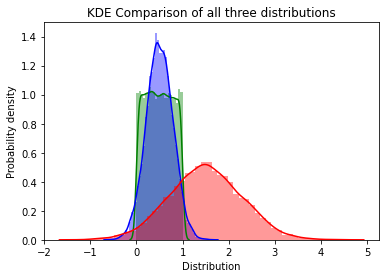

In [3]:
ax = sns.distplot(distri,kde=True,color='g')
ax = sns.distplot(distri_gaussian,kde=True,color='b')
ax = sns.distplot(distri_gaussian_2,kde=True,color='r')

#-----------------------------------------------------------------------------------------------------------
ax.set(xlabel='Distribution',ylabel='Probability density',title='KDE Comparison of all three distributions')

# One-Sample t-test :
- Used to test the if a hypothesised mean value about a population can be accepted based on the sample from the population available 
- The parametric version uses students t-distribution to calculate the critical value and the p-value 


- H0 - The mean of the population is x 
- Ha - The mean of the population is not x (two-sided)

### Data Creation (Sample)

[21.25117263 31.71340202 35.76517901 28.73781982 34.90660393]


<AxesSubplot:ylabel='Density'>

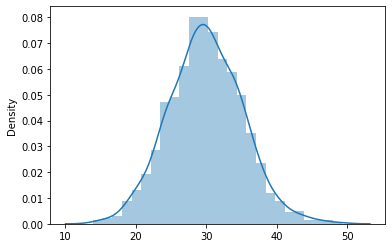

In [4]:
np.random.seed(100) #Reproducible results

distri_norm = np.random.normal(30,5,1000) #mean=30, std dev=5,n=1k

#--------------------------------------------------------------------
print(distri_norm[0:5])
sns.distplot(distri_norm)

In [5]:
#UDF for manual creation of one-tailed t-test along with scipy benchmarking

from scipy.stats import t #Importing t-table calculator

"""
H0 (Null Hypothesis) : The population mean is 34 i.e 34 is the accuracte estimate of mean of the population from which the sample is drawn
H1 (Alternative Hypothesis) : The population mean not equal 34 (Two-tailed) 
"""

def one_tailed_ttest(distri_norm_gen,hypo_mean_gen,mode,alpha = 0.05):

    mean_sample = np.mean(distri_norm_gen)
    print('Mean of sample :',mean_sample)

    n = len(distri_norm_gen)
    print('No of obs in sample :',n)

    std_sample = np.std(distri_norm_gen, ddof=1) #ddof = no to subtract from n for degree of freedom, in this case n-1
    print('Standard Dev of sample :',std_sample)

    hypo_mean = hypo_mean_gen #The hypothesised mean of the population
    print('Hypothesized mean of population :',hypo_mean) 

    #-----------------------------------------------------------------------------------------------------------------
    #Calculating t-statistic for the test
    t_stat = ((mean_sample - hypo_mean)/std_sample)*np.sqrt(n)
    print('T-statistic :',t_stat)
    
    #Conditional approach for two-tailed/one-tailed system
    if mode=='less':
        
        #Calculating critical t-value
        t_critical = t.ppf(alpha,n-1)
        print('Critical t-value:',t_critical)
        
        # confirm with cdf
        p_val = t.cdf(t_stat,n-1)
        print('p-value associated with t_statistic :',p_val)
        
        print('#------------------------ Status by manual code -----------------------------#')
        if t_stat<=t_critical:
            print('H0 Rejected')
        else:
            print('Cannot reject H0')
        
    elif mode=='greater':
        #Calculating critical t-value
        t_critical = t.ppf(1-alpha,n-1)
        print('Critical t-value:',t_critical)

        # confirm with cdf
        p_val = 1-t.cdf(t_stat,n-1)
        print('p-value associated with t_statistic :',p_val)
        
        print('#------------------------ Status by manual code -----------------------------#')
        if t_stat>=t_critical:
            print('H0 Rejected')
        else:
            print('Cannot reject H0')
        
    elif mode=='two-sided':
        #Calculating critical t-value
        t_critical = t.ppf(1-(alpha/2),n-1)
        print('Critical t-values are:',-t_critical,'&',t_critical)
    
        # confirm with cdf
        if t_stat>=t_critical:
            p_val = 2*(1-t.cdf(t_stat,n-1)) #Twice since this time its on one-side,
                                            #but the alt hypothesis is for both sides (greater & smaller)
        elif t_stat<=-t_critical:
            p_val = 2*t.cdf(t_stat,n-1) #Same explanation as above
        
        print('p-value associated with t_statistic :',p_val)

        print('#------------------------ Status by manual code -----------------------------#')
        if (t_stat<=-t_critical) | (t_stat>=t_critical):
            print('H0 Rejected')
        else:
            print('Cannot reject H0')
            
    print('#----------- Benchmarking against Scipy package of the same functionality :-------#')
    print(stats.ttest_1samp(a=distri_norm_gen,popmean=hypo_mean_gen,alternative=mode))
    
    
#---------------------------------------------------------------------------------------------------------------
#Invoking the UDF

one_tailed_ttest(distri_norm_gen=distri_norm,hypo_mean_gen=34,mode='two-sided',alpha = 0.05)

Mean of sample : 29.916139213280452
No of obs in sample : 1000
Standard Dev of sample : 5.2318301664727
Hypothesized mean of population : 34
T-statistic : -24.684099678617265
Critical t-values are: -1.9623414611334487 & 1.9623414611334487
p-value associated with t_statistic : 2.0609936909297652e-105
#------------------------ Status by manual code -----------------------------#
H0 Rejected
#----------- Benchmarking against Scipy package of the same functionality :-------#
Ttest_1sampResult(statistic=-24.68409967861726, pvalue=2.0609936909299414e-105)


### Findings : The test statistic as well p-value generated by both manual & scipy implementation are same and the hypothesis can indeed be rejected

# Two-Sampled tests :
1. Unpaired two-sample tests :-
    - Parametric Test (t-test)
    - Non-Parametric Test (Wilcoxon Rank Sum test/Man Whitney U test)
2. Paired two-sample tests (Used in A/B testing) :-
    - Parametric Test (t-test)
    - Non-Parametric Test (Wilcoxon Signed Rank test)
    
- H0 - The distributions are similar (drawn from same distribution)
- Ha - The distributions are not similar (drawn from different ditributions)

### Generating datapoints of varied distributions to check the performance of the tests 

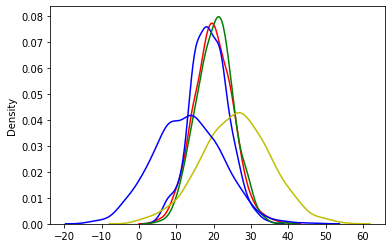

In [6]:
np.random.seed(100) #Set seed for consistent results

#-----------------------------------------------------------------------------------------
distri_norm_1 = np.random.normal(20,5,1000) #mean=20, std dev=5,n=1000
distri_norm_2 = np.random.normal(18.8,5,1000) #mean=18.8, std dev=8,n=1000
distri_norm_3 = np.random.normal(20,5,700) #mean=20, std dev=5,n=700
distri_norm_4 = np.random.normal(26,9,1000) #mean=26, std dev=9,n=700
distri_norm_5 = np.random.normal(13,9,1500) #mean=13, std dev=9,n=1500

#-----------------------------------------------------------------------------------------

dict_ = {1 : 'r',2 : 'b',
         3 : 'g',4 : 'y',
         5 : 'b'} 

#-----------------------------------------------------------------------------------------
counter = 1
for dist in [distri_norm_1,distri_norm_2,distri_norm_3,distri_norm_4,distri_norm_5]:
    color_ = dict_[counter]
    sns.distplot(dist,color=color_,hist=False)
    counter += 1

## Two-Tailed Parametric tests (Students t-tests):

In [7]:
def two_sample_ttest(group_1,group_2,mode,paired_status='unpaired',alpha=0.05): #Paired Status can be either 'paired'/'unpaired'

    if paired_status=='unpaired': #For independent observations
        
        print('#------------- UN-PAIRED 2 sample t-test --------------#')
        
        #Calculation of parameters from Group 1 ------------------------
        
        g1_mean = np.mean(group_1)
        print('Group 1 mean :',g1_mean)

        g1_std = np.std(group_1,ddof=1)
        print('Std Dev of group 1:',g1_std)

        n_1 = len(group_1)
        print('No of Obs in group 1:',n_1)

        #Calculation of parameters from Group 2 ------------------------

        g2_mean = np.mean(group_2)
        print('Group 2 mean :',g2_mean)

        g2_std = np.std(group_2,ddof=1)
        print('Std Dev of group 2:',g2_std)

        n_2 = len(group_2)
        print('No of Obs in group 1:',n_2)

        #---------------------------------------------------------------
        combined_dof = n_1 + n_2 - 2
        print('Combined DoF:',combined_dof)
        
        #Denominator for the t statistic to be calculated
        denom_1 = np.sqrt(((g1_std**2)/n_1) + ((g2_std**2)/n_2))

        t_stat = (g1_mean - g2_mean)/denom_1
        print('t-statistic :',t_stat)

        #--------------------------------------------------------------------------------------
        #Conditional Statements for two-tailed or one-tailed. Generally two-tailed tests are used 
        
        if mode=='less':
            #Calculating critical t-value
            t_critical = t.ppf(alpha,combined_dof)
            print('Critical t-value:',t_critical)

            # confirm with cdf
            p_val = t.cdf(t_stat,combined_dof)
            print('p-value associated with t_statistic :',p_val)

            print('#------------------------ Status by manual code -----------------------------#')
            if t_stat<=t_critical: #One can alternatively apply > condition on p-value 
                print('H0 Rejected')
            else:
                print('Cannot reject H0')


        elif mode=='greater':
            
            #Calculating critical t-value
            t_critical = t.ppf(1-alpha,combined_dof)
            print('Critical t-value:',t_critical)

            # confirm with cdf
            p_val = 1-t.cdf(t_stat,combined_dof)
            print('p-value associated with t_statistic :',p_val)

            print('#------------------------ Status by manual code -----------------------------#')
            if t_stat>=t_critical: #One can alternatively apply > condition on p-value
                print('H0 Rejected')
            else:
                print('Cannot reject H0')

        elif mode=='two-sided':
            
            #Calculating critical t-value
            t_critical = t.ppf(1-(alpha/2),combined_dof)
            print('Critical t-values are:',-t_critical,'&',t_critical)

            p_val = 2 * (1-t.cdf(abs(t_stat), combined_dof)) 
            print('p-value associated with t_statistic :',p_val)

            print('#------------------------ Status by manual code -----------------------------#')
            if (t_stat<=-t_critical) | (t_stat>=t_critical):
                print('H0 Rejected')
            else:
                print('Cannot reject H0')

        print('#----------- Benchmarking results from Scipy package of the same functionality :-------#')
        print(stats.ttest_ind(group_1,group_2,alternative=mode,equal_var=False))
        
    elif paired_status=='paired':
        
        print('#------------- PAIRED 2 sample t-test --------------#')
        
        assert len(group_1)==len(group_2), "Length of distri not matching" #For paired tests, the lengths of groups must be same
        
        g1_mean = np.mean(group_1)
        print('Group 1 mean :',g1_mean)
        
        g2_mean = np.mean(group_2)
        print('Group 2 mean :',g2_mean)
        
        n = len(group_1)
        print('No of Obs in groups :',n)
        
        d1 = np.sum(np.square(group_1-group_2))
        d2 = np.sum(group_1-group_2)
        
        s = np.sqrt((d1 - (d2**2/n))/(n-1))
        print('S value :',s)
        
        combined_dof = n-1 
        
        t_stat = (g1_mean - g2_mean)/np.sqrt((s**2)/n)
        print('t-statistic :',t_stat)
        
        #--------------------------------------------------------------------------------------
        #Conditional statement for two-tailed or on-tailed
        
        if mode=='less':
            #Calculating critical t-value
            t_critical = t.ppf(alpha,combined_dof)
            print('Critical t-value:',t_critical)

            # confirm with cdf
            p_val = t.cdf(t_stat,combined_dof)
            print('p-value associated with t_statistic :',p_val)

            print('#------------------------ Status by manual code -----------------------------#')
            if t_stat<=t_critical:
                print('H0 Rejected')
            else:
                print('Cannot reject H0')


        elif mode=='greater':
            #Calculating critical t-value
            t_critical = t.ppf(1-alpha,combined_dof)
            print('Critical t-value:',t_critical)

            # confirm with cdf
            p_val = 1-t.cdf(t_stat,combined_dof)
            print('p-value associated with t_statistic :',p_val)

            print('#------------------------ Status by manual code -----------------------------#')
            if t_stat>=t_critical:
                print('H0 Rejected')
            else:
                print('Cannot reject H0')

        elif mode=='two-sided':
            #Calculating critical t-value
            t_critical = t.ppf(1-(alpha/2),combined_dof)
            print('Critical t-values are:',-t_critical,'&',t_critical)

            p_val = (1 - t.cdf(abs(t_stat), combined_dof)) * 2.0
            print('p-value associated with t_statistic :',p_val)

            print('#------------------------ Status by manual code -----------------------------#')
            if (t_stat<=-t_critical) | (t_stat>=t_critical):
                print('H0 Rejected')
            else:
                print('Cannot reject H0')

        print('#----------- Benchmarking results from Scipy package of the same functionality :-------#')
        print(stats.ttest_rel(group_1,group_2,alternative=mode))        



#----------------------------------------------------------------------------------------------------------
#Invoking the above UDF for parametric two-tailed tests

two_sample_ttest(group_1=distri_norm_1,group_2=distri_norm_4,mode='two-sided',paired_status='paired',alpha=0.05)

#------------- PAIRED 2 sample t-test --------------#
Group 1 mean : 19.916139213280452
Group 2 mean : 25.97363377056564
No of Obs in groups : 1000
S value : 10.672290860868104
t-statistic : -17.948798402160826
Critical t-values are: -1.9623414611334487 & 1.9623414611334487
p-value associated with t_statistic : 0.0
#------------------------ Status by manual code -----------------------------#
H0 Rejected
#----------- Benchmarking results from Scipy package of the same functionality :-------#
Ttest_relResult(statistic=-17.948798402160815, pvalue=1.1830171602062667e-62)


### Findings - The t-statistic and p-values from both manual and scipy implementations are matching (for p-value, the difference is very low)

## Two-Tailed Non-Parametric Tests :
1. Man-Whitney U test (unpaired)
2. Wilcoxon Signed Rank test (Paired) 

- H0 - The distributions are similar (drawn from same distribution)
- Ha - The distributions are not similar (drawn from different ditributions)

In [8]:
def rank_sum_fn(a,b): #To execute the rank sum process used in Man-Whitney Test

    print('Group 1 length :',len(a))
    print('Group 2 length :',len(b))
    
    #---------------------------------------------------------------------------------------------------------
    df = pd.DataFrame()
    df['a'] = a
    df=df.append(pd.DataFrame(b,columns=['b']))
    df['combined'] = np.where(df['a'].isnull()==True,df['b'],np.where(df['b'].isnull()==True,df['a'],np.nan))
    df.sort_values(['combined'],ascending=True,inplace=True)
    df['rank'] = df['combined'].rank(method='average',na_option='keep')
    
    #---------------------------------------------------------------------------------------------------------
    rank_sum_a = df[df['a'].isnull()==False]['rank'].sum()
    rank_sum_b = df[df['b'].isnull()==False]['rank'].sum()

    print('Group 1 rank sum :',rank_sum_a)
    print('Group 2 rank sum :',rank_sum_b)
    
    return rank_sum_a,rank_sum_b

In [9]:
def man_whitney_u(group_1,group_2,mode): #To execute till test-statistic calculation only
    
    n1 = len(group_1)
    n2 = len(group_2)
    
    r1,r2 = rank_sum_fn(group_1,group_2) #Utilising the rank sum UDF defined above
    
    u1 = r1 - n1*(n1+1)/2                # method 2, step 3
    u2 = n1 * n2 - u1    
    
    u = max(u1,u2)
    
    print('U statistic :',u)
    
    p = stats.norm.sf(u) #Needs to be corrected for ties between groups
    #print(p)
    
    print('------- Benchmarking the statistic value from scipy-------')
    print(stats.mannwhitneyu(x=group_1,y=group_2,alternative=mode))
    
    return u

man_whitney_u(group_1=distri_norm_1,group_2=distri_norm_2,mode='two-sided')

Group 1 length : 1000
Group 2 length : 1000
Group 1 rank sum : 1059485.0
Group 2 rank sum : 941515.0
U statistic : 558985.0
------- Benchmarking the statistic value from scipy-------
MannwhitneyuResult(statistic=558985.0, pvalue=4.929218713297083e-06)


558985.0

## Wilcoxon Signed Rank Test (yet to be added)

# Three or more samples test :
1. Parametric :-
    - ANOVA (Only One-way is described here) + Tukeys HSD as post-hoc test
2. Non-Parametric :-
    - Kruskal Wallis + Dunn's as post-hoc test
    - Friedmann's + Dunn's as post-hoc test   
    
- H0 - The distributions are similar (drawn from same distribution)
- Ha - The distributions are not similar (drawn from different ditributions)

## One-Way ANOVA (yet to be added)

In [10]:
#One-Way ANOVA 

## Kruskal Wallis Omnibus Test (Un-Paired) - for 3 groups only

In [11]:
def rank_sum_fn_3(a,b,c): #UDF to calculate rank sums of 3 groups (an extensionof a similar function above)

    print('Group 1 length :',len(a))
    print('Group 2 length :',len(b))
    print('Group 3 length :',len(c))
    
    #---------------------------------------------------------------------------------------------------------
    #Creating a dataframe for ease of simultaneous operations
    df = pd.DataFrame()
    df['a'] = a
    df=df.append(pd.DataFrame(b,columns=['b']))
    df=df.append(pd.DataFrame(c,columns=['c']))
    
    df['combined'] = np.where((df['a'].isnull()==True) & (df['c'].isnull()==True),df['b'],
                              np.where((df['b'].isnull()==True) & (df['a'].isnull()==True),df['c'],
                                      np.where((df['b'].isnull()==True) & (df['c'].isnull()==True),df['a'],np.nan)))
    
    df.sort_values(['combined'],ascending=True,inplace=True)
    df['rank'] = df['combined'].rank(method='average',na_option='keep')
    
    #---------------------------------------------------------------------------------------------------------
    #Extracting rank sums
    rank_sum_a = df[df['a'].isnull()==False]['rank'].sum()
    rank_sum_b = df[df['b'].isnull()==False]['rank'].sum()
    rank_sum_c = df[df['c'].isnull()==False]['rank'].sum()
    
    print('Group 1 rank sum :',rank_sum_a)
    print('Group 2 rank sum :',rank_sum_b)
    print('Group 3 rank sum :',rank_sum_c)
    
    return rank_sum_a,rank_sum_b,rank_sum_c

In [12]:
def kruskal_wallis_omnibus(group_1,group_2,group_3,alpha=0.05):
    
    n1 = len(group_1)
    n2 = len(group_2)
    n3 = len(group_3)
    
    n = n1+n2+n3
    
    r1,r2,r3 = rank_sum_fn_3(group_1,group_2,group_3) #Calculating the rank-sum of all the groups
    
    cum_sum = ((r1**2)/n1) + ((r2**2)/n2) + ((r3**2)/n3) #
    
    h_stat = 12/(n*(n+1)) * cum_sum - 3*(n+1)
    
    h_critical = stats.chi2.ppf(alpha,2) #dof for KW is no of groups - 1
    
    p_val = (1.0 - stats.chi2.cdf(h_stat, 2)) 
    
    print('#----------- Results from manual code ------------#')
    if h_stat>h_critical:
        
        print('Can reject H0, p-value:',p_val,'h_stat:',h_stat,'critical_h_stat:',h_critical)
        
    else:
        
        print('Cannot reject H0, p-value:',p_val,'h_stat:',h_stat,'critical_h_stat:',h_critical)
        
        
    print('#----------- Benchmarking from scipy module --------------#')
    stat,p = stats.kruskal(group_1,group_2,group_3)
    print(p,stat)
    
    
#-------------------------------------------------------------------------------------------------------
#Invoking the above UDF

kruskal_wallis_omnibus(group_1=distri_norm_1,
                       group_2=distri_norm_2,
                       group_3=distri_norm_3,
                       alpha=0.05)

Group 1 length : 1000
Group 2 length : 1000
Group 3 length : 700
Group 1 rank sum : 1390330.0
Group 2 rank sum : 1230386.0
Group 3 rank sum : 1025634.0
#----------- Results from manual code ------------#
Can reject H0, p-value: 9.727384453483978e-10 h_stat: 41.501811752730646 critical_h_stat: 0.10258658877510106
#----------- Benchmarking from scipy module --------------#
9.727384512873298e-10 41.501811752730646


### Finding : The test statistic & p-value from manual and scipy implementation are matching

## Friedman's Omnibus Test (Paired) - for 3 groups only

In [13]:
def friedmans_omnibus(group_1,group_2,group_3,alpha=0.05):
    
    assert len(group_1)==len(group_2)==len(group_3), "The group lengths are dissimilar - Please check"
    
    n = len(group_1)
    
    df = pd.DataFrame()
    
    df['a'] = list(group_1)
    df['b'] = list(group_2)
    df['c'] = list(group_3)
    
    df = df.rank(axis=1, ascending=True).astype(int)
    
    a_rank_sum = df['a'].sum()
    b_rank_sum = df['b'].sum()
    c_rank_sum = df['c'].sum()
    
    fm_stat = (12/(n * 3 * 4)) * (a_rank_sum**2 + b_rank_sum**2 + c_rank_sum**2) - (3 * n * 4)
    
    fm_critical = stats.chi2.ppf(alpha,2) #dof for friedman is no of groups - 1
    
    p_val = (1.0 - stats.chi2.cdf(fm_stat, 2)) 
    
    print('#----------- Results from manual code ------------#')
    if fm_stat>fm_critical:
        
        print('Can reject H0, p-value:',p_val,'h_stat:',fm_stat,'critical_h_stat:',fm_critical)
        
    else:
        
        print('Cannot reject H0, p-value:',p_val,'h_stat:',fm_stat,'critical_h_stat:',fm_critical)
        
        
    print('#----------- Benchamrking from scipy module --------------#')
    stat,p = stats.friedmanchisquare(group_1,group_2,group_3)
    print(p,stat)
    
    

    
friedmans_omnibus(distri_norm_1,distri_norm_2,distri_norm_4,alpha=0.05)    

#----------- Results from manual code ------------#
Can reject H0, p-value: 0.0 h_stat: 324.34200000000055 critical_h_stat: 0.10258658877510106
#----------- Benchamrking from scipy module --------------#
3.715605313481779e-71 324.34200000000055


### Findings : The test statistic and the p-value are matching (difference in p-val is very low) 

# END